In [64]:
from numpy import *
import pylab
from scipy import integrate
import matplotlib.pyplot as plt

Attempt to solve the PA model differential equations system.

In [65]:
# Definition of parameters
p = 0.01
k = 40
q = 8
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))
def dX_dt(t, X):
    c = X[0]
    b = X[1]
    return array([ (1 - p) * (c_down(c) * theta_down(b, c) ** q - c_up(c) * theta_up(b, c) ** q) + p / 2 * (c_down(c) - c_up(c)) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q * (k - 2 * q - 2 * (k - q) * theta_down(b, c)) + p * k / 2 * (1 - 2 * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q * (k - 2 * q - 2 * (k - q) * theta_up(b, c)) + p * k / 2 * (1 - 2 * theta_up(b, c)))) ])
    

In [66]:
def p_from_c(c, q, k):
    """Not working yet, sth is wrong in Arek article or I do not understand it

    Args:
        c (_type_): _description_
        q (_type_): _description_
        k (_type_): _description_

    Returns:
        _type_: _description_
    """    
    b = 2 * (c * (1 - c) * ((1 - c) ** q - c ** q) - (q / k) * (1 - 2 * c) * (c * (1 - c) ** q + (1 - c) * c ** q)) / ((1 - c) ** q - c ** q - (q / k) * (1 - 2 * c) * ((1 - c) ** q + c ** q))
    X = c_down(c) * theta_down(b, c) ** q - c_up(c) * theta_up(b, c) ** q
    Y = c_down(c) * theta_down(b, c) ** q - c_up(c) * theta_up(b, c) ** q - (c_down(c) - c_up(c)) / 2
    return X / (X - Y)

In [67]:
c = 1
q = 8
k = 40

In [68]:
p_from_c(0.6, 8, 40)

-0.048943497987377245

In [69]:
t = linspace(0, 1500,  10000)              # time
X0 = array([0.4, 0.1])                 # initials conditions
sol = integrate.solve_ivp(dX_dt, [0, 3000], X0, dense_output=True)

Text(0, 0.5, 'value')

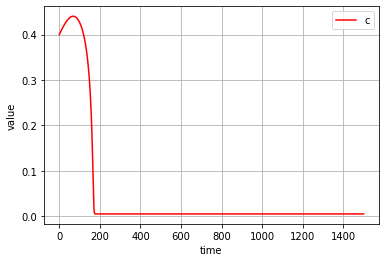

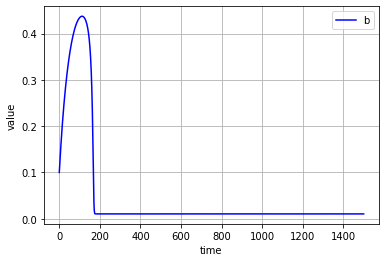

In [70]:
c, b = sol.sol(t)
f1 = pylab.figure()
pylab.plot(t, c, 'r-', label='c')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('time')
pylab.ylabel('value')
f2 = pylab.figure()
pylab.plot(t, b  , 'b-', label='b')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('time')
pylab.ylabel('value')

For different $q_a$ and $q_c$

In [71]:
from numpy import *
import pylab
from scipy import integrate
# Definition of parameters
p = 0.03
k = 50
q_a = 4
q_c = 10
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * (1 - c))
theta_up = lambda b, c: b / ((2 * c))
def dX_dt(t, X, p):
    """ Return the growth rate of fox and rabbit populations. """
    c = X[0]
    b = X[1]
    return array([ (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c)))) ])
    

In [78]:
P = linspace(0, 0.07, 100)
t = linspace(0, 100000,  10000)
Stable_states = ones(size(P))
for i, p in enumerate(P):
    X0 = array([0.999, 1 - 0.999])                 # initials conditions
    sol = integrate.solve_ivp(dX_dt, [0, 100000], X0, args = [p], dense_output = True)
    c, b = sol.sol(t)
    Stable_states[i] = c[-1]

trying to calculate c vs p

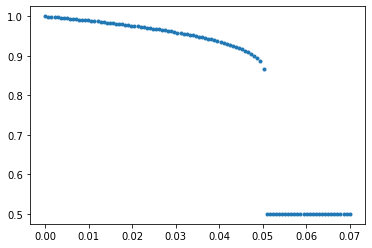

In [ ]:
plt.plot(P, Stable_states, '.')

In [74]:
P = linspace(0, 0.07, 100)
t = linspace(0, 100000,  10000)
Stable_states = ones(size(P))
for i, p in enumerate(P):
    X0 = array([0.50001, 0.1])                 # initials conditions
    sol = integrate.solve_ivp(dX_dt, [0, 100000], X0, args = [p], dense_output = True)
    c, b = sol.sol(t)
    Stable_states[i] = c[-1]

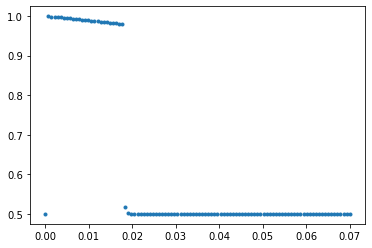

In [75]:
plt.plot(P, Stable_states, '.')

In [76]:
def p_from_c(c):
    b = 2 * (c * (1 - c) * ((1 - c) ** q - c ** q) - (q / k) * (1 - 2 * c) * (c * (1 - c) ** q) + (1 - c) * c ** q) / ((1 - c) ** q - c ** q - (q / k) * (1 - 2 * c) * ((1 - c) ** q + c ** q))
    X = c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up ** q_c
    Y = c_down(c) * (1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a
    p = X / (X  -Y)

In [77]:
plt.plot(p_from_c(b, linspace(0.35, 0.65, 100), q_a, q_c))

TypeError: p_from_c() takes 1 positional argument but 4 were given